In [1]:
import requests
import json

import numpy as np
import os
import time
import random
import math
import sys
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# from mpltools import annotation

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

## Untils Defination

cmd_prefix is the prefix of command. If you change the path of exec file, do not forget to change it

In [2]:
cmd_prefix = "./back-end-tests/manyRequest"
1 > math.inf

False

In [3]:
def run_command(cmd):
    """
    run cmd and return the result
    
    parameters:
        cmd: str
            command 
    
    """
    return os.popen(cmd).read()

def get_run_time(result):
    prefix = "Time Cost:  "
    print(result)
    return float(result[result.index(prefix) + len(prefix):result.index(" ms")])

def get_request_url(pdiameter = 100,
    pdensity = 300,
    velocity = 20,
    theta = 45,
    tdensity = 2500,
    depth = 0,
    distance = 100):
    
    URL = """http://121.36.81.191/cgi-bin/crater.cgi?dist=%d&distanceUnits=1&diam=%d&diameterUnits=1&pdens=%d&pdens_select=0&vel=%d&velocityUnits=1&theta=%d&tdens=%d&wdepth=%d&wdepthUnits=1""" % (distance, pdiameter, pdensity, velocity, theta, tdensity, depth)
    return URL

In [19]:
def record_times_get(times, url, sleep = False):
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    samples = 20
    
    for t in times:
        records[t] = []
        for sample in range(samples):
            params = " --url='%s' --requestMethod=get --requestTimes=%d" % (url, t)
            records[t].append(get_run_time(run_command(cmd = cmd_prefix + params)))
            
        if sleep:
            time.sleep(1*60)
    return records

def record_time_post(times, url,
                     pdiameter = 200,
                    pdensity = 300,
                    velocity = 20,
                    theta = 45,
                    tdensity = 2500,
                    depth = 0,
                    distance = 100,
                    sleep = False):
    
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    params_data = " --impactor_density=%d --impactor_diameter=%d --impactor_velocity=%d --impactor_theta=%d --target_density=%d --target_depth=%d --target_distance=%d " % (
    pdensity, pdiameter, velocity, theta, tdensity, depth, distance)
    samples = 20
    
    for t in times:
        records[t] = []
        for sample in range(samples):
            params = " --url='%s' --requestMethod=post --requestTimes=%d " % (url, t)
            records[t].append(get_run_time(run_command(cmd = cmd_prefix + params + params_data)))
        
    return records
    
    

In [5]:
def random_float(down, upper):
    return random.random() * (upper - down) + down

def record_times_get_random(times, sleep = False):
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    
    samples = 20
    
    for t in times:
        
        records[t] = []
        for sample in range(samples):
            density_choice = random.randint(0,2)
            tdensity = 2500
            depth = 0

            if density_choice == 0:
                tdensity = 1000
                depth = random.random()*1000 + 1000
            elif density_choice == 1:
                pass
            else:
                tdensity = 2750
                depth = 0

            pdiameter = 10 ** random.randint(1, 5)
            scaller = 0.4

            url = get_request_url(pdiameter = pdiameter, # m
                            pdensity = random_float(1000, 8000),
                            velocity = random_float(11.2, 72),
                            theta = random_float(10, 80),
                            tdensity = tdensity,
                            depth = depth, 
                            distance = pdiameter * scaller) # scaller = 40 % km
            # print(url)
            params = " --url='%s' --requestMethod=get --requestTimes=%d" % (url, t)
            records[t].append(get_run_time(run_command(cmd = cmd_prefix + params)))

        if sleep:
            time.sleep(90)

    return records

def record_time_post_random(times, url, sleep = False):
    
    """
    paramters:
        times: slice or numpy.ndarray, 
                howMayTimes, request
        url: string
            address of get request
    """
    
    times = np.array(times)
    records = {}
    samples = 20
    
    for t in times:
        
        records[t] = []
        for sample in range(samples):
            density_choice = random.randint(0,2)
            tdensity = 2500
            depth = 0

            if density_choice == 0:
                tdensity = 1000
                depth = random.random()*1000 + 1000
            elif density_choice == 1:
                pass
            else:
                tdensity = 2750
                depth = 0

            pdiameter = 10 ** random.randint(1, 5)
            scaller = 0.4

            pdiameter = pdiameter # m
            pdensity = random_float(1000, 8000)
            velocity = random_float(11.2, 72)
            theta = random_float(10, 80)
            tdensity = tdensity
            depth = depth
            distance = pdiameter * scaller

            params_data = " --impactor_density=%d --impactor_diameter=%d --impactor_velocity=%d --impactor_theta=%d --target_density=%d --target_depth=%d --target_distance=%d " % (
            pdensity, pdiameter, velocity, theta, tdensity, depth, distance)

            params = " --url='%s' --requestMethod=post --requestTimes=%d " % (url, t)
            records[t].append(get_run_time(run_command(cmd = cmd_prefix + params + params_data)))

        if sleep:
            time.sleep(90)

        
    return records
    
    

In [285]:
run_command("git pull && cd back-end-tests/ && go build manyRequest.go")

'Already up to date.\n'

## Collect Runtime

### Old Web Tool

In [8]:
times = [i for i in range(20, 400, 20)]

In [9]:
records = record_times_get(times, get_request_url(), sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&diam=100&diameterUnits=1&pdens=300&pdens_select=0&vel=20&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  1151 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&diam=100&diameterUnits=1&pdens=300&pdens_select=0&vel=20&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  1101 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&diam=100&diameterUnits=1&pdens=300&pdens_select=0&vel=20&velocityUnits=1&theta=45&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  964 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=100&distanceUnits=1&dia

### new web tool

In [ ]:
records_post = record_time_post(times, "http://121.36.81.191:50052/simulator", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  81 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  55 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  42 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  61 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  51 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  423 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  3038 ms

http://121.36.81.191:50052/simu

In [ ]:
records_redis = record_time_post(times, "http://121.36.81.191:50052/simulatorWithRedis", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  116 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  11 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  11 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  9 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  11 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  13 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorW

In [ ]:
records, records_post, records_redis
sorted(records[20])[2:-8]

[964.0, 974.0, 978.0, 993.0, 997.0, 1013.0, 1049.0, 1061.0, 1064.0, 1074.0]

### plot the results

In [ ]:
x = list(records.keys())
y = [sum(sorted(records[k])[2:-8])/10 for k in x]
print((x,y))

x2 = list(records_post.keys())
y2 = [sum(sorted(records_post[k])[2:-8])/10 for k in x]

x3 = list(records_redis.keys())
y3 = [sum(sorted(records_redis[k])[2:-8])/10 for k in x]

data_index = [x, x2, x3]
data = [y, y2, y3]


([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380], [1016.7, 2054.3, 3048.5, 4088.7, 5106.7, 6144.3, 7195.5, 8631.9, 10050.3, 11169.2, 12004.2, 13352.8, 14254.7, 15813.0, 17282.2, 17538.7, 18488.2, 20175.4, 21763.4])


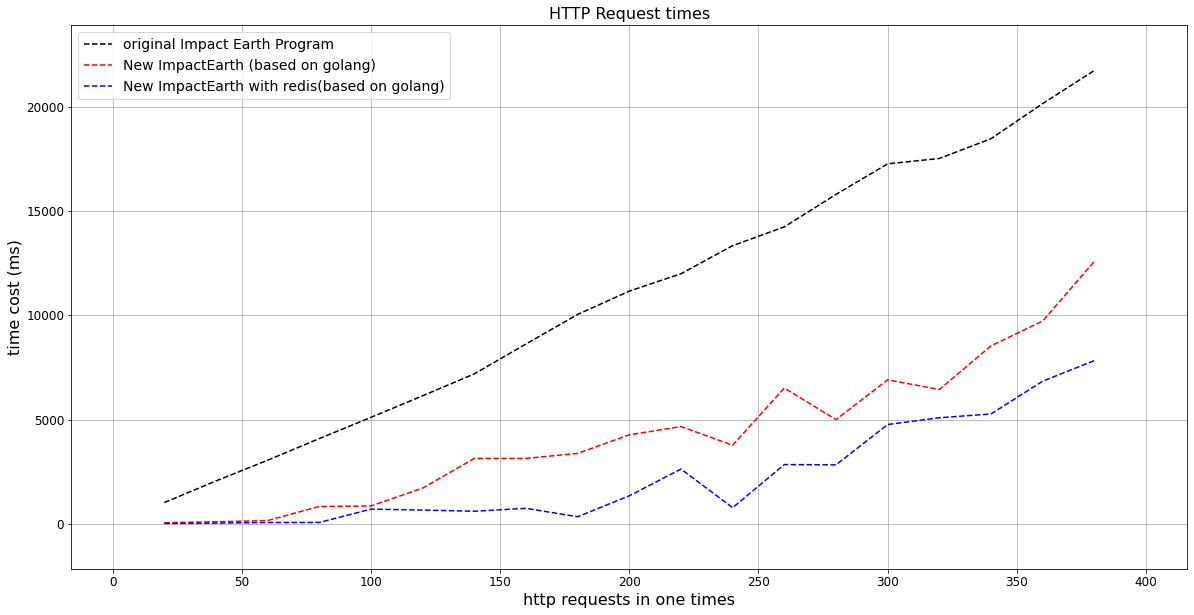

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

color = ['k', 'r', 'b', 'g', 'c', 'y']
shape = ['-','.']
labels = ["original Impact Earth Program", "New ImpactEarth (based on golang)", "New ImpactEarth with redis(based on golang)"]

for i in range(len(data)):
    ax1.plot(data_index[i], data[i], '%s%s-'%(color[i%6], shape[0]), 
         label=labels[i])


ax1.set_xlabel('http requests in one times', fontsize=16)
ax1.set_ylabel('time cost (ms)', fontsize=16)
ax1.set_title('HTTP Request times', fontsize=16)
ax1.legend(loc='best', fontsize=14);

plt.savefig("../img/HTTP_Request_Time_new_valid_2.png")

## Test with random Request

In [32]:
### pre_train_redis
records_redis_random = record_time_post_random([400 for _ in range(200)], "http://121.36.81.191:50052/simulatorWithRedis", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 400 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  4499 ms

http://121.36.81.191:50052/simulator
Run request for 400 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  8291 ms

http://121.36.81.191:50052/simulator
Run request for 400 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  5414 ms

http://121.36.81.191:50052/simulator
Run request for 400 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  1905 ms

http://121.36.81.191:50052/simulator
Run request for 400 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  3598 ms

http://121.36.81.191:50052/simulator
Run request for 400 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  4293 ms

http://121.36.81.191:50052/simulator
Run request for 400 times to with Redis URL: http://121.36.81.1

KeyboardInterrupt: 

In [30]:
randvalue = []

for i in range(10):
    randvalue.append(random.randint(0, 10000))

randvalue

[6944, 6141, 3781, 558, 9748, 5625, 8634, 9367, 2468, 1610]

In [33]:
records_random = record_times_get_random(times, sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=40000&distanceUnits=1&diam=100000&diameterUnits=1&pdens=4501&pdens_select=0&vel=17&velocityUnits=1&theta=51&tdens=2750&wdepth=0&wdepthUnits=1 
Time Cost:  9301 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=4000&distanceUnits=1&diam=10000&diameterUnits=1&pdens=3736&pdens_select=0&vel=58&velocityUnits=1&theta=11&tdens=1000&wdepth=1648&wdepthUnits=1 
Time Cost:  6898 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=4000&distanceUnits=1&diam=10000&diameterUnits=1&pdens=7966&pdens_select=0&vel=49&velocityUnits=1&theta=34&tdens=2500&wdepth=0&wdepthUnits=1 
Time Cost:  7298 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191/cgi-bin/crater.cgi?dist=40000

In [ ]:
records_post_random = record_time_post_random(times, "http://121.36.81.191:50052/simulator", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  406 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  404 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  301 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  408 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  401 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  402 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulator 
Time Cost:  496 ms

http://121.36.81.191:50052/

In [ ]:
records_redis_random = record_time_post_random(times, "http://121.36.81.191:50052/simulatorWithRedis", sleep = True)

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  797 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  298 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  405 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  307 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  298 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simulatorWithRedis 
Time Cost:  405 ms

http://121.36.81.191:50052/simulator
Run request for 20 times to with Redis URL: http://121.36.81.191:50052/simu

In [36]:
records_post_random, records_random, records_redis_random

({20: [406.0,
   404.0,
   301.0,
   408.0,
   401.0,
   402.0,
   496.0,
   295.0,
   597.0,
   614.0,
   486.0,
   306.0,
   500.0,
   300.0,
   393.0,
   393.0,
   599.0,
   685.0,
   703.0,
   709.0],
  40: [897.0,
   991.0,
   891.0,
   613.0,
   890.0,
   1010.0,
   609.0,
   895.0,
   902.0,
   992.0,
   892.0,
   904.0,
   714.0,
   893.0,
   806.0,
   799.0,
   706.0,
   895.0,
   790.0,
   599.0],
  60: [902.0,
   1591.0,
   1207.0,
   1206.0,
   1200.0,
   1401.0,
   1108.0,
   1390.0,
   1185.0,
   1498.0,
   1189.0,
   1379.0,
   1898.0,
   1285.0,
   1284.0,
   1000.0,
   913.0,
   995.0,
   1203.0,
   915.0],
  80: [1308.0,
   1498.0,
   1600.0,
   1903.0,
   1702.0,
   1909.0,
   2188.0,
   1508.0,
   1601.0,
   1603.0,
   2003.0,
   1712.0,
   1611.0,
   1597.0,
   2001.0,
   1309.0,
   2092.0,
   1392.0,
   1984.0,
   1609.0],
  100: [1894.0,
   2790.0,
   2295.0,
   1999.0,
   1680.0,
   1714.0,
   2395.0,
   1783.0,
   2494.0,
   2300.0,
   2194.0,
   2111.0,
   201

([20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380], [7135.3, 14227.2, 21008.2, 28382.2, 36049.7, 42764.0, 50056.5, 56403.5, 64828.9, 72477.6, 77025.3, 85501.5, 92074.2, 97592.7, 106369.0, 113389.3, 119687.6, 128278.8, 135110.4])


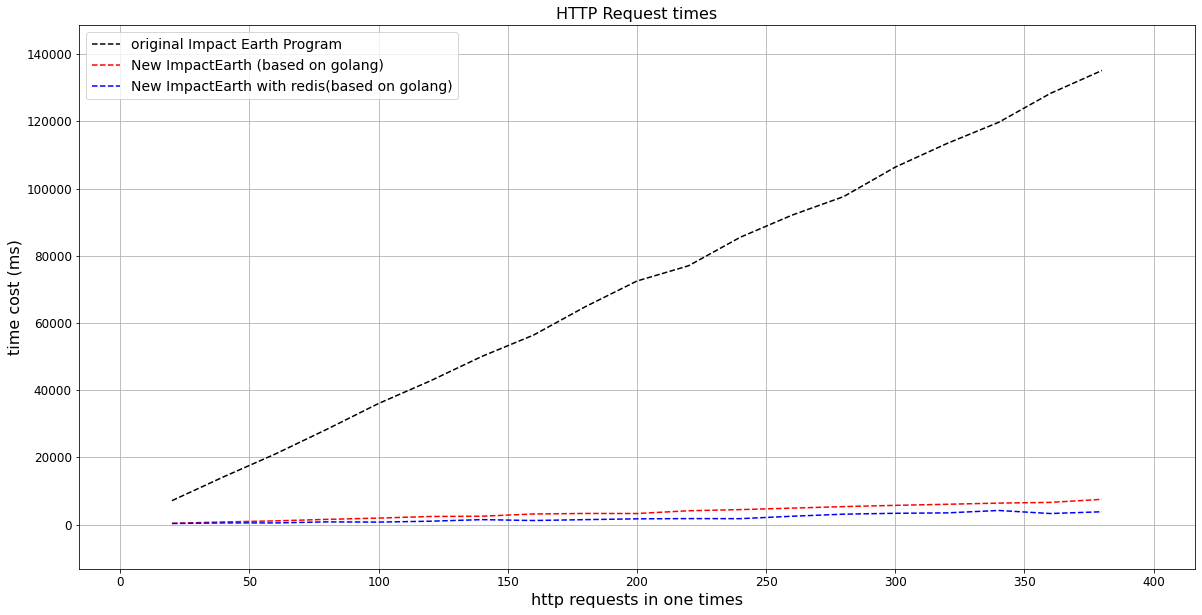

In [37]:
x_random = list(records_random.keys())
y_random = [sum(sorted(records_random[k])[2:-8])/10 for k in x_random]
print((x_random,y_random))

x2_random = list(records_post_random.keys())
y2_random = [sum(sorted(records_post_random[k])[2:-8])/10 for k in x_random]

x3_random = list(records_redis_random.keys())
y3_random = [sum(sorted(records_redis_random[k])[2:-8])/10 for k in x_random]

data_index_random = [x_random, x2_random, x3_random]
data_random = [y_random, y2_random, y3_random]

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

color = ['k', 'r', 'b', 'g', 'c', 'y']
shape = ['-','.']
labels = ["original Impact Earth Program", "New ImpactEarth (based on golang)", "New ImpactEarth with redis(based on golang)"]

for i in range(len(data_random)):
    ax1.plot(data_index_random[i], data_random[i], '%s%s-'%(color[i%6], shape[0]), 
         label=labels[i])


ax1.set_xlabel('http requests in one times', fontsize=16)
ax1.set_ylabel('time cost (ms)', fontsize=16)
ax1.set_title('HTTP Request times', fontsize=16)
ax1.legend(loc='best', fontsize=14);

plt.savefig("../img/HTTP_Request_Time_random_with_valid_parameter.png")


[[7135.3, 14227.2, 21008.2, 28382.2, 36049.7, 42764.0, 50056.5, 56403.5, 64828.9, 72477.6, 77025.3, 85501.5, 92074.2, 97592.7, 106369.0, 113389.3, 119687.6, 128278.8, 135110.4], [390.0, 799.4, 1120.8, 1572.1, 1944.9, 2429.7, 2504.9, 3171.5, 3329.0, 3307.4, 4132.7, 4471.2, 4908.2, 5365.1, 5739.7, 6060.9, 6405.1, 6620.6, 7531.5], [340.3, 510.4, 513.3, 814.8, 757.6, 1020.1, 1488.5, 1227.0, 1489.9, 1726.1, 1800.0, 1778.9, 2494.8, 3116.9, 3376.8, 3497.8, 4214.3, 3307.3, 3832.4], [1016.7, 2054.3, 3048.5, 4088.7, 5106.7, 6144.3, 7195.5, 8631.9, 10050.3, 11169.2, 12004.2, 13352.8, 14254.7, 15813.0, 17282.2, 17538.7, 18488.2, 20175.4, 21763.4], [48.7, 93.7, 152.3, 829.2, 853.0, 1710.0, 3136.5, 3136.8, 3376.8, 4270.2, 4665.3, 3770.4, 6514.2, 5000.8, 6911.6, 6446.1, 8538.7, 9733.8, 12596.2], [11.0, 29.1, 60.8, 60.5, 701.5, 656.0, 599.9, 738.6, 335.8, 1341.7, 2626.5, 770.7, 2840.7, 2826.9, 4763.4, 5088.5, 5270.5, 6845.3, 7833.0]]


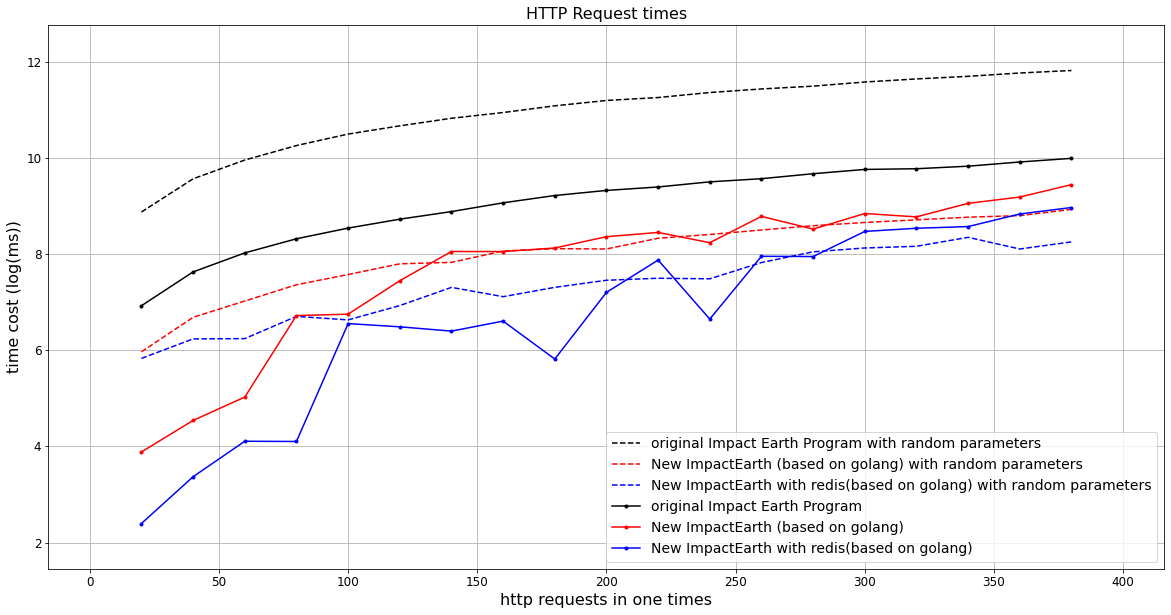

In [40]:
data_total = data_random + data
print(data_total)

fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)
ax1.grid(True)

# color = ['k', 'r', 'b', 'g', 'c', 'y']
color = ['k', 'r', 'b']
shape = ['-','.']
labels = ["original Impact Earth Program with random parameters", "New ImpactEarth (based on golang) with random parameters", "New ImpactEarth with redis(based on golang) with random parameters", 
         "original Impact Earth Program", "New ImpactEarth (based on golang)", "New ImpactEarth with redis(based on golang)"]

for i in range(len(data_total)):
    ax1.plot(data_index[0], np.log(data_total[i]), '%s%s-'%(color[i%3], shape[i//3]), 
         label=labels[i])


ax1.set_xlabel('http requests in one times', fontsize=16)
ax1.set_ylabel('time cost (log(ms))', fontsize=16)
ax1.set_title('HTTP Request times', fontsize=16)
ax1.legend(loc='best', fontsize=14);

plt.savefig("../img/HTTP_Request_Time_total.png")


In [176]:
random.random()*1000 + 1000

1427.0276143838205